## Dataset 2

## Imports

In [171]:
import os
import requests
import pandas as pd
from PIL import Image
import io
import ast
import random
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from lambeq.backend.grammar import Ty, Box 
from lambeq import BobcatParser, AtomicType, Sim14Ansatz, RemoveCupsRewriter, Rewriter
from lambeq import spiders_reader, cups_reader, stairs_reader, TreeReader

import matplotlib.pyplot as plt
import numpy as np


print("(*) All libraries are successfully imported!\n")

(*) All libraries are successfully imported!



## Dataset

Split the dataset and label into trainign and testing similar to the pennyland model

In [172]:
# # ==============================================
# # ==============================================

# print("Data already stored")

# # Specify the folder and file name
# file_name = "Features_Dataset_2.csv"

# # Construct the file path
# file_path = os.path.join(os.getcwd(), file_name)
# df = pd.read_csv(file_path)

# # Extract the sentence
# # sentence_pos,sentence_neg,image,label_pos,label_neg
# sentence_1 = df['sentence_pos']
# sentence_2 = df['sentence_neg']
# image = df['image']
# label_sen1 = df['label_pos']
# label_sen2 = df['label_neg']

# # df = pd.DataFrame({
# #     'sentence': sentence,
# #     'image_1': image_1,
# #     'image_2': image_2,
# #     'label_image1': label_image1,
# #     'label_image2': label_image2
# # })

# df = pd.DataFrame({
#     'sentence_1': sentence_1,
#     'sentence_2': sentence_2,
#     'image': image,
#     'label_sen1': label_sen1,
#     'label_sen2': label_sen2
# })

# # Make the image_1 and image_2 into float lists instead of strings
# # df["image_1"] = df["image_1"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# # df["image_2"] = df["image_2"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# # Make the image into float lists instead of strings
# df["image"] = df["image"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


# # =================================
# # RE ORDER THE LABELS AND IMAGES!
# # =================================

# print(f" Length of dataframe: {len(df)}")

# n = random.randint(80, 120) # Number of indicies to swap
# print( " Amount of indicies to swap: ", n)

# index_to_swap = random.sample(range(0, len(df) + 1), n)
# # print(f" Random Indicies to swap: \n{index_to_swap}")

# for index, row in df.iterrows():
#     if index in index_to_swap:
#         # print(f" Index {index}: swapping")
#         # Swap imags and labels
#         # df.at[index, 'image_1'], df.at[index, 'image_2'] = df.at[index, 'image_2'], df.at[index, 'image_1']
#         # df.at[index, 'label_image1'], df.at[index, 'label_image2'] = df.at[index, 'label_image2'], df.at[index, 'label_image1']
#         df.at[index, 'sentence_1'], df.at[index, 'sentence_2'] = df.at[index, 'sentence_2'], df.at[index, 'sentence_1']
#         df.at[index, 'label_sen1'], df.at[index, 'label_sen2'] = df.at[index, 'label_sen2'], df.at[index, 'label_sen1']
        

# print("(*) Completed swapping the values of random n labels. \n")

Random train,val ,test split!

In [173]:
# # =================================

# # First split: train and combined validation/test set
# train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# # Second split: validation and test set
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# train_df = train_df.reset_index(drop=True)
# val_df = val_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)

# # Print the sizes of each set to verify
# print(f" Training set size: {len(train_df)}")
# print(f" Validation set size: {len(val_df)}")
# print(f" Test set size: {len(test_df)}")

# # Specify the folder path and file name
# folder_path = os.path.join(os.getcwd(), "Split_Datasets_2")

# # Check if the folder exists, if not, create it
# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)

# file_name = "train_df.csv"
# file_path = os.path.join(folder_path, file_name)
# train_df.to_csv(file_path, index=False)
# print(f"File saved to: {file_path} as {file_name}")

# file_name = "val_df.csv"
# file_path = os.path.join(folder_path, file_name)
# val_df.to_csv(file_path, index=False)
# print(f"File saved to: {file_path} as {file_name}")

# file_name = "test_df.csv"
# file_path = os.path.join(folder_path, file_name)
# test_df.to_csv(file_path, index=False)
# print(f"File saved to: {file_path} as {file_name}")

# print("(*) Data Extracted!\n")

In [174]:
# def random_swap(df, relative_path):
#     n = random.randint(0,len(df)) # Number of indicies to swap
#     print( f" Amount of indicies to swap: {n} / {len(df)}")

#     index_to_swap = random.sample(range(0, len(df) + 1), n)
#     # print(f" Random Indicies to swap: \n{index_to_swap}")

#     for index, row in df.iterrows():
#         if index in index_to_swap:
#             df.at[index, 'sentence_pos'], df.at[index, 'sentence_neg'] = df.at[index, 'sentence_neg'], df.at[index, 'sentence_pos']
#             df.at[index, 'label_pos'], df.at[index, 'label_neg'] = df.at[index, 'label_neg'], df.at[index, 'label_pos']

#     print("(*) Completed swapping the values of random n labels. \n")

#     # Save the DataFrame to a CSV file
#     full_path = os.path.join(os.getcwd(), relative_path)
#     os.makedirs(os.path.dirname(full_path), exist_ok=True)

#     df.to_csv(full_path, index=False)
#     print(f"DataFrame saved to {full_path}")
    
# # random_swap(train_df, "swap_train_df.csv")
# random_swap(val_df, "Features_Dataset_2/swap_val_df.csv")
# random_swap(test_df, "Features_Dataset_2/swap_test_df.csv")

# print("(*) Completed swapping the values of random n labels. \n")
# # =================================

Extrcat data from train, val, and test datasets

In [175]:
# Specify the folder and file name
folder_name = "Features_Dataset_2"

file_name = "swap_train_df.csv"
file_path = os.path.join(os.getcwd(), folder_name, file_name)
train_df = pd.read_csv(file_path)
train_df["image"] = train_df["image"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

file_name = "swap_val_df.csv"
file_path = os.path.join(os.getcwd(), folder_name, file_name)
val_df = pd.read_csv(file_path)
val_df["image"] = val_df["image"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

file_name = "swap_test_df.csv"
file_path = os.path.join(os.getcwd(), folder_name, file_name)
test_df = pd.read_csv(file_path)
test_df["image"] = test_df["image"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print("Data from Train, Val, and Test is extracted.")

Data from Train, Val, and Test is extracted.


## Sentences Diagram & Circuit

In [176]:
# Variables to define

# Index to show the sample words
sample_index = 3

remove_cups = RemoveCupsRewriter()
rewriter = Rewriter(['prepositional_phrase', 'determiner'])

Sentence 1 (sentence_1)

 using tree reader
 ↓ example senetnce diagram from raw train dataset, index : 3


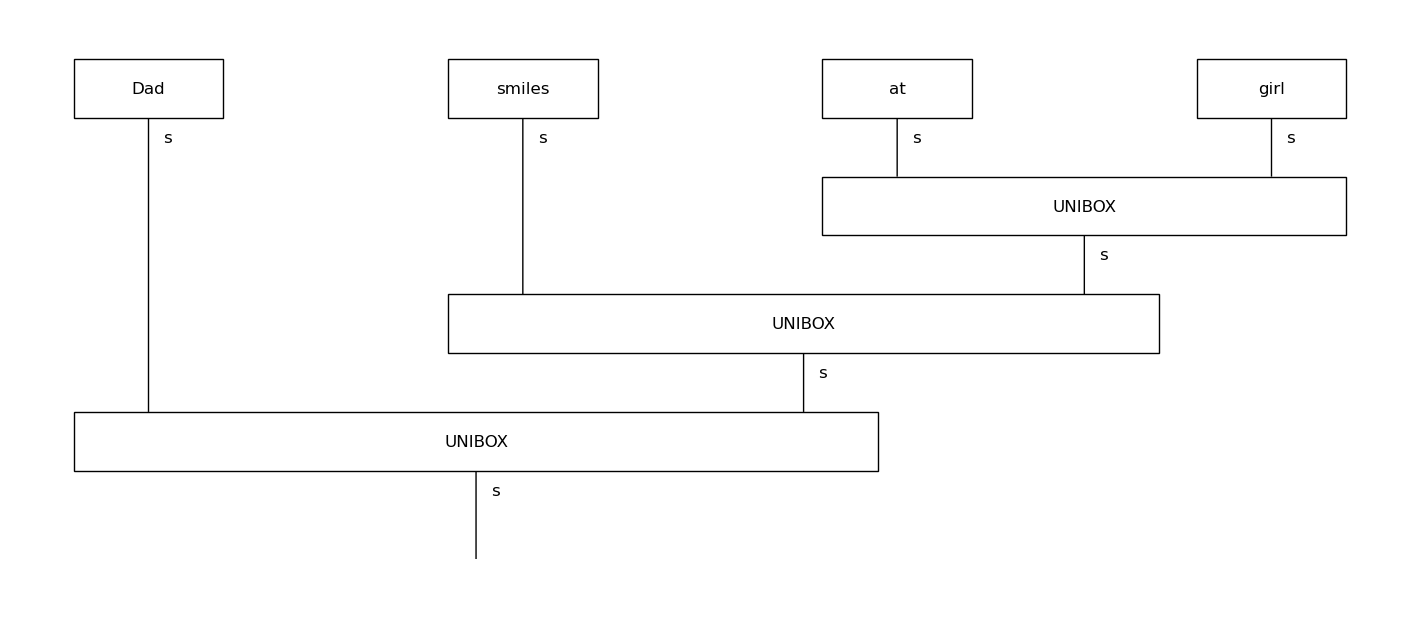

 rewritting the article grammar sentences ..
 ↓ example senetnce diagram from rewritten train dataset, index : 3


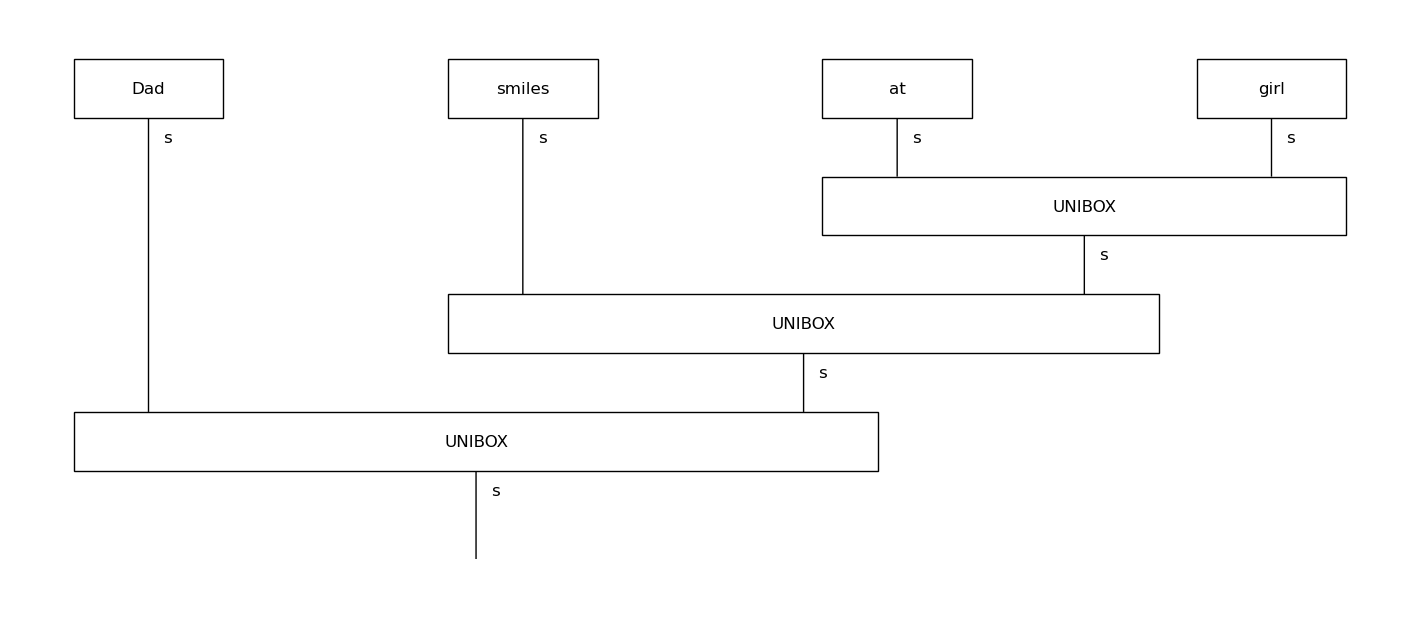

 removing cups from rewritten diagrams ..
 ↓ sample sentence diagram without cups from rewritten train datase, index : 3


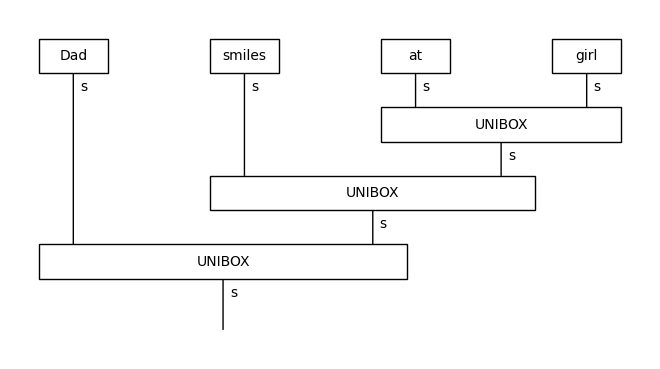

In [177]:
# Parse sentence 1
train_sentence_1 = train_df["sentence_pos"]
val_sentence_1 = val_df["sentence_pos"]
test_sentence_1 = test_df["sentence_pos"]

# Use BobbcatParser to convert it into a string diagram
# # ==============================================================
# print(" Using DisCoCat Model ..")
# parser = BobcatParser(verbose='suppress')
# raw_train_sentence_diagrams = [parser.sentence2diagram(sentence) for sentence in train_sentence_1]
# raw_val_sentence_diagrams = [parser.sentence2diagram(sentence) for sentence in val_sentence_1]
# raw_test_sentence_diagrams = [parser.sentence2diagram(sentence) for sentence in test_sentence_1]
# # ==============================================================

# # Use Bag of words to convert it into a string diagram
# print(" using Bag of words ..")
# # ==============================================================
# raw_train_sentence_diagrams = [spiders_reader.sentence2diagram(sentence) for sentence in train_sentence_1]
# raw_val_sentence_diagrams = [spiders_reader.sentence2diagram(sentence) for sentence in val_sentence_1]
# raw_test_sentence_diagrams = [spiders_reader.sentence2diagram(sentence) for sentence in test_sentence_1]
# # ==============================================================

# Use Cups to convert it into a string diagram
# print(" using cups ..")
# # ==============================================================
# raw_train_sentence_diagrams = [cups_reader.sentence2diagram(sentence) for sentence in train_sentence_1]
# raw_val_sentence_diagrams = [cups_reader.sentence2diagram(sentence) for sentence in val_sentence_1]
# raw_test_sentence_diagrams = [cups_reader.sentence2diagram(sentence) for sentence in test_sentence_1]
# # ==============================================================

# # Use Stairs sequence to convert it into a string diagram
# print(" using stairs ..")
# # ==============================================================
# raw_train_sentence_diagrams = [stairs_reader.sentence2diagram(sentence) for sentence in train_sentence_1]
# raw_val_sentence_diagrams = [stairs_reader.sentence2diagram(sentence) for sentence in val_sentence_1]
# raw_test_sentence_diagrams = [stairs_reader.sentence2diagram(sentence) for sentence in test_sentence_1]
# # ==============================================================

# Using tree reader
print(" using tree reader")
# ==============================================================
reader = TreeReader()
raw_train_sentence_diagrams = [reader.sentence2diagram(sentence) for sentence in train_sentence_1]
raw_val_sentence_diagrams = [reader.sentence2diagram(sentence) for sentence in val_sentence_1]
raw_test_sentence_diagrams = [reader.sentence2diagram(sentence) for sentence in test_sentence_1]
# ==============================================================

# --------
print(f" ↓ example senetnce diagram from raw train dataset, index : {sample_index}")
raw_train_sentence_diagrams[sample_index].draw(figsize=(14, 6), fontsize=12)
# --------

# Use the rewriter function to remove any prepositionla and determinators
print(" rewritting the article grammar sentences ..")
rewritten_train_sentence_diagrams = [rewriter(diag) for diag in raw_train_sentence_diagrams]
rewritten_val_sentence_diagrams = [rewriter(diag) for diag in raw_val_sentence_diagrams]
rewritten_test_sentence_diagrams = [rewriter(diag) for diag in raw_test_sentence_diagrams]
# --------
print(f" ↓ example senetnce diagram from rewritten train dataset, index : {sample_index}")
rewritten_train_sentence_diagrams[sample_index].draw(figsize=(14, 6), fontsize=12)
# --------

# Use remove cups to decrease the number of wires used
print(" removing cups from rewritten diagrams ..")
train_diagrams_sentence_1 = [remove_cups(sentence_diagram) for sentence_diagram in rewritten_train_sentence_diagrams]
val_diagrams_sentence_1 = [remove_cups(sentence_diagram) for sentence_diagram in rewritten_val_sentence_diagrams]
test_diagrams_sentence_1 = [remove_cups(sentence_diagram) for sentence_diagram in rewritten_test_sentence_diagrams]
# --------
print(f' ↓ sample sentence diagram without cups from rewritten train datase, index : {sample_index}')
train_diagrams_sentence_1[sample_index].draw()
# --------

Sentence 2 (sentence_2)

 using tree reader
 ↓ example senetnce diagram from raw train dataset, index : 3


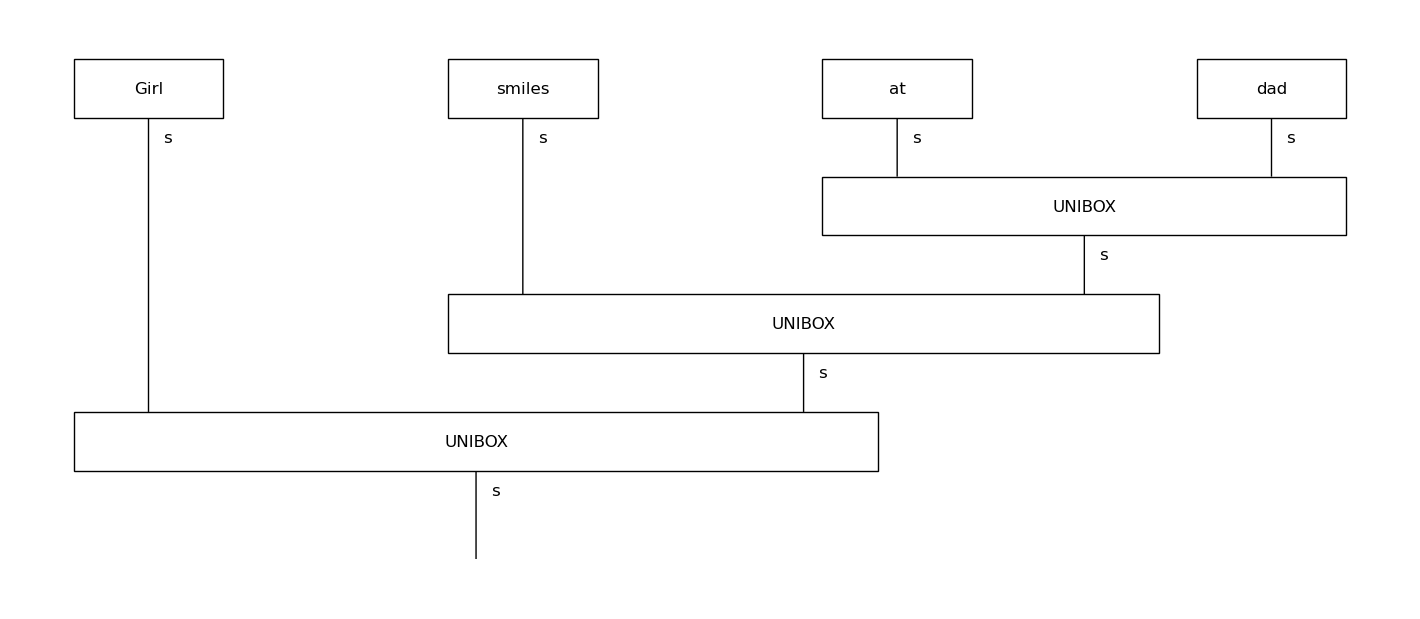

 rewritting the article grammar sentences ..
 ↓ example senetnce diagram from rewritten train dataset, index : 3


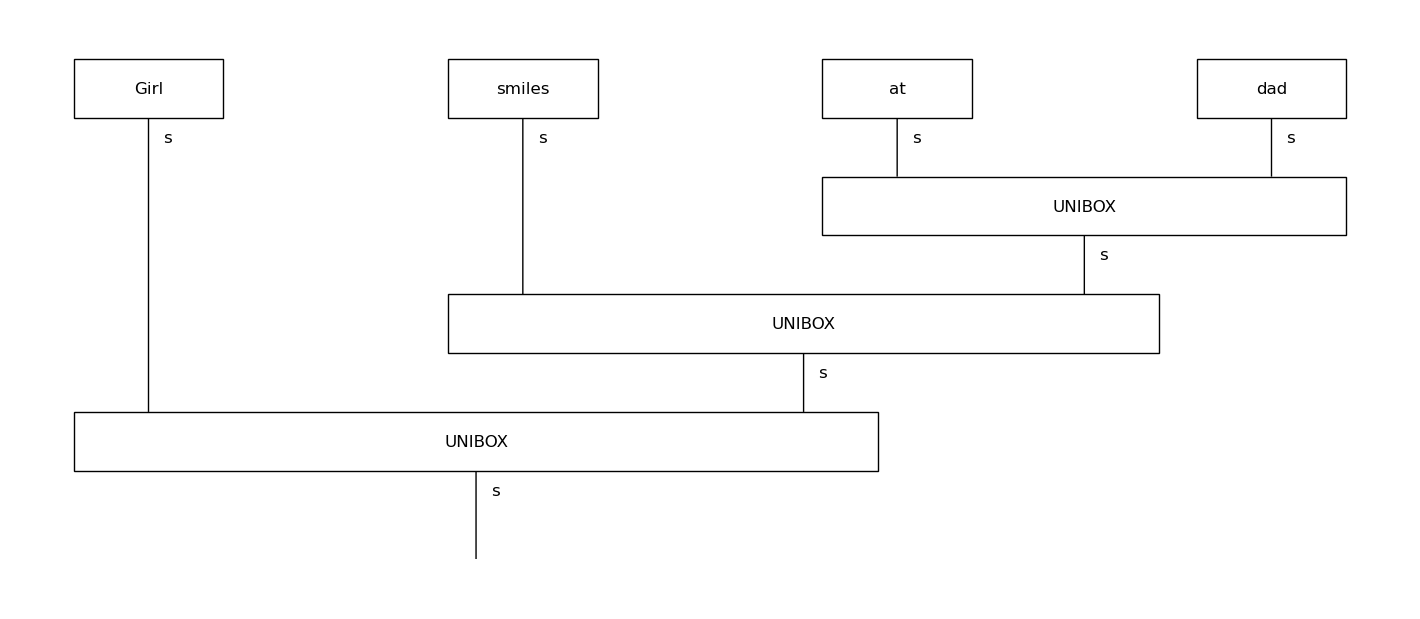

 removing cups from rewritten diagrams ..
 ↓ sample sentence diagram without cups from rewritten train datase, index : 3


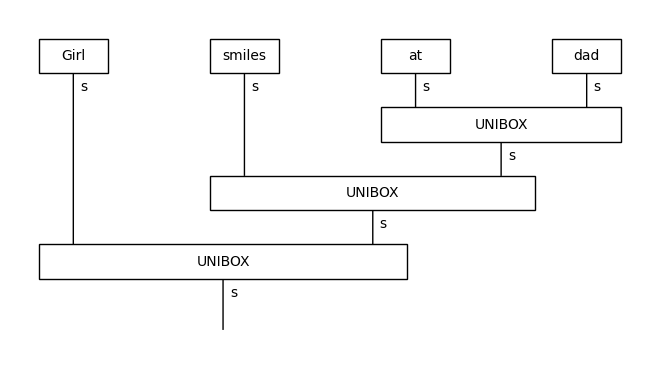

In [178]:
# Parse sentence 1
train_sentence_2 = train_df["sentence_neg"]
val_sentence_2 = val_df["sentence_neg"]
test_sentence_2 = test_df["sentence_neg"]

# Use BobbcatParser to convert it into a string diagram
# # ==============================================================
# print(" Using DisCoCat Model ..")
# parser = BobcatParser(verbose='suppress')
# raw_train_sentence_diagrams = [parser.sentence2diagram(sentence) for sentence in train_sentence_2]
# raw_val_sentence_diagrams = [parser.sentence2diagram(sentence) for sentence in val_sentence_2]
# raw_test_sentence_diagrams = [parser.sentence2diagram(sentence) for sentence in test_sentence_2]
# # ==============================================================

# # Use Bag of words to convert it into a string diagram
# print(" using Bag of words ..")
# # ==============================================================
# raw_train_sentence_diagrams = [spiders_reader.sentence2diagram(sentence) for sentence in train_sentence_2]
# raw_val_sentence_diagrams = [spiders_reader.sentence2diagram(sentence) for sentence in val_sentence_2]
# raw_test_sentence_diagrams = [spiders_reader.sentence2diagram(sentence) for sentence in test_sentence_2]
# # ==============================================================

# # Use Cups to convert it into a string diagram
# print(" using cups ..")
# # ==============================================================
# raw_train_sentence_diagrams = [cups_reader.sentence2diagram(sentence) for sentence in train_sentence_2]
# raw_val_sentence_diagrams = [cups_reader.sentence2diagram(sentence) for sentence in val_sentence_2]
# raw_test_sentence_diagrams = [cups_reader.sentence2diagram(sentence) for sentence in test_sentence_2]
# # ==============================================================

# Use Stairs sequence to convert it into a string diagram
# print(" using stairs ..")
# # ==============================================================
# raw_train_sentence_diagrams = [stairs_reader.sentence2diagram(sentence) for sentence in train_sentence_2]
# raw_val_sentence_diagrams = [stairs_reader.sentence2diagram(sentence) for sentence in val_sentence_2]
# raw_test_sentence_diagrams = [stairs_reader.sentence2diagram(sentence) for sentence in test_sentence_2]
# # ==============================================================

# Using tree reader
print(" using tree reader")
# ==============================================================
reader = TreeReader()
raw_train_sentence_diagrams = [reader.sentence2diagram(sentence) for sentence in train_sentence_2]
raw_val_sentence_diagrams = [reader.sentence2diagram(sentence) for sentence in val_sentence_2]
raw_test_sentence_diagrams = [reader.sentence2diagram(sentence) for sentence in test_sentence_2]
# ==============================================================

# --------
print(f" ↓ example senetnce diagram from raw train dataset, index : {sample_index}")
raw_train_sentence_diagrams[sample_index].draw(figsize=(14, 6), fontsize=12)
# --------

# Use the rewriter function to remove any prepositionla and determinators
print(" rewritting the article grammar sentences ..")
rewritten_train_sentence_diagrams = [rewriter(diag) for diag in raw_train_sentence_diagrams]
rewritten_val_sentence_diagrams = [rewriter(diag) for diag in raw_val_sentence_diagrams]
rewritten_test_sentence_diagrams = [rewriter(diag) for diag in raw_test_sentence_diagrams]
# --------
print(f" ↓ example senetnce diagram from rewritten train dataset, index : {sample_index}")
rewritten_train_sentence_diagrams[sample_index].draw(figsize=(14, 6), fontsize=12)
# --------

# Use remove cups to decrease the number of wires used
print(" removing cups from rewritten diagrams ..")
train_diagrams_sentence_2 = [remove_cups(sentence_diagram) for sentence_diagram in rewritten_train_sentence_diagrams]
val_diagrams_sentence_2 = [remove_cups(sentence_diagram) for sentence_diagram in rewritten_val_sentence_diagrams]
test_diagrams_sentence_2 = [remove_cups(sentence_diagram) for sentence_diagram in rewritten_test_sentence_diagrams]
# --------
print(f' ↓ sample sentence diagram without cups from rewritten train datase, index : {sample_index}')
train_diagrams_sentence_2[sample_index].draw()
# --------

To be removed

In [179]:
# stop here?

# ansatz_sentence = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1},n_layers=2)

# train_circuits_sentence = [ansatz_sentence(diagram) for diagram in train_diagrams_sentence]
# val_circuits_sentence = [ansatz_sentence(diagram) for diagram in val_diagrams_sentence]
# test_circuits_sentence = [ansatz_sentence(diagram) for diagram in test_diagrams_sentence]
# # --------
# print(f' ↓ sample sentence circuit from train dataset, index : {sample_index}')
# train_circuits_sentence[sample_index].draw(figsize=(30, 20), fontsize=12)
# # --------

# print("(*) Ansatz created for all senetnces!\n")

## Image Diagram & Circuit

↓ template image box


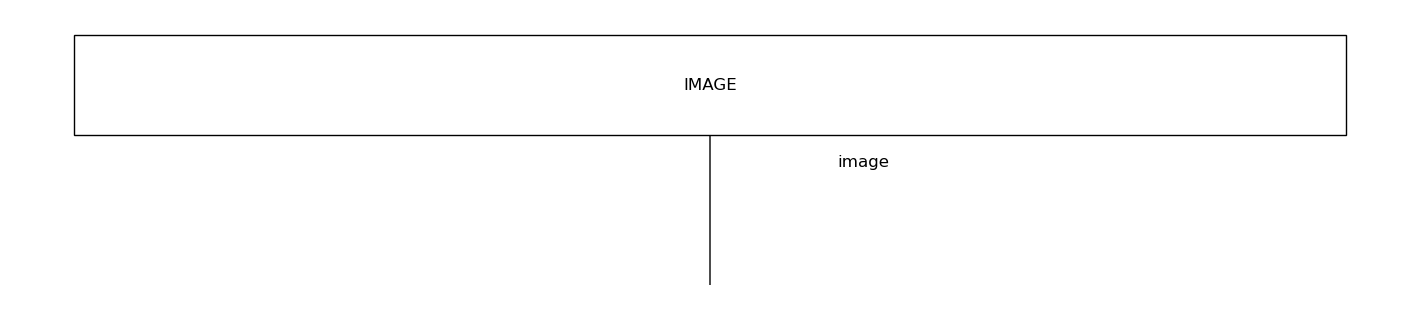

↓ template image circuit


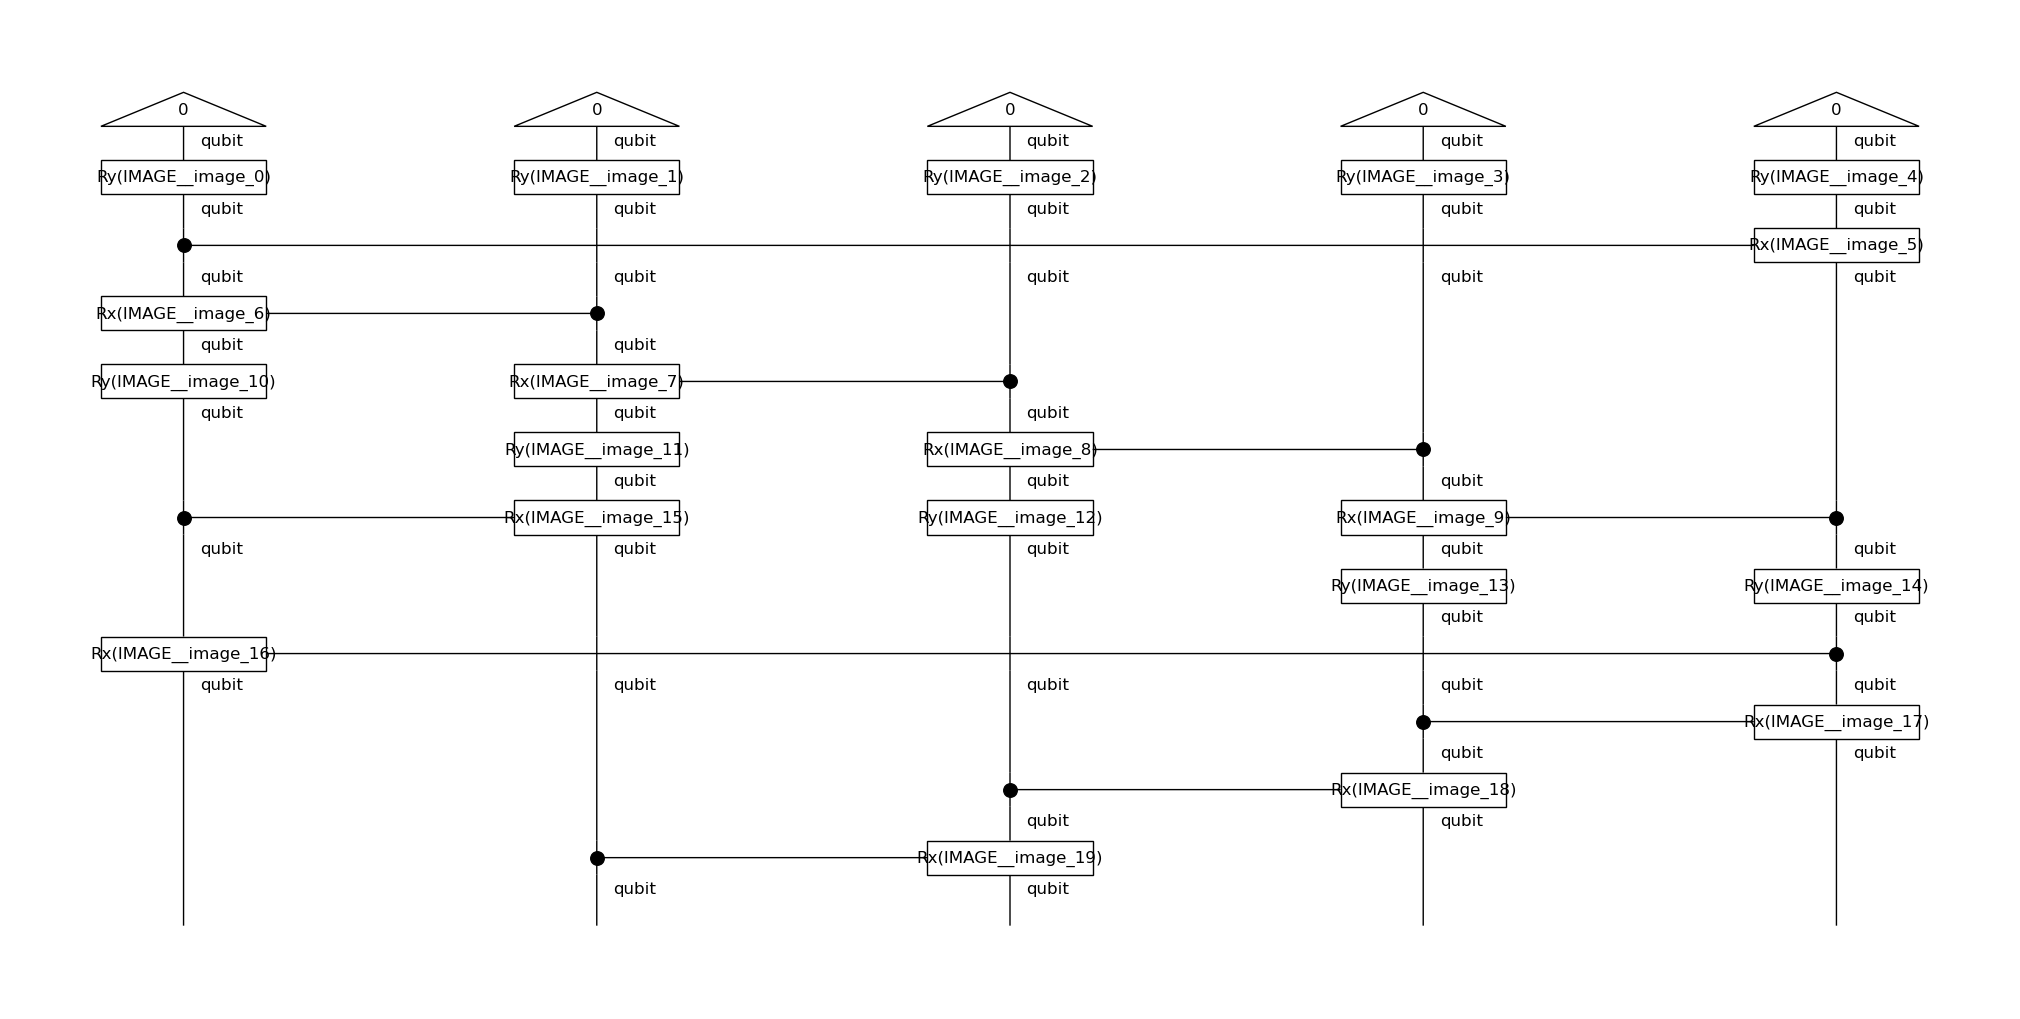

 Complete: circuits for positive image
 ↓ sample sentence diagram without cups from train dataset
(*) Circuits and digrams created for all images!



In [180]:
# Create a new image Ty
image_type = Ty("image")
image_box = Box(name = "IMAGE", dom = Ty(), cod= image_type)
print('↓ template image box')
image_box.draw(figsize=(14, 3), fontsize=12)

# Create template Ansatz
ansatz = Sim14Ansatz({image_type: 5}, n_layers=1)
image_circ = ansatz(image_box)
print('↓ template image circuit')
image_circ.draw(figsize=(20, 10), fontsize=12)

# Add data into image circuit POSITIVE
train_images = train_df["image"]
val_images = val_df["image"]
test_images = test_df["image"]

train_circuits_image = [image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec) for feature_vec in train_images]
val_circuits_image = [image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec) for feature_vec in val_images]
test_circuits_image = [image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec) for feature_vec in test_images]
print(" Complete: circuits for positive image")
#  --------
print(' ↓ sample sentence diagram without cups from train dataset')
# train_circuits_image[sample_index].draw(figsize=(20, 10), fontsize=12)
#  --------

# # Add data into image circuit NEGATIVE
# train_images_2 = train_df["image_2"]
# val_images_2 = val_df["image_2"]
# test_images_2 = test_df["image_2"]

# train_circuits_image2 = [image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec) for feature_vec in train_images_2]
# val_circuits_image2 = [image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec) for feature_vec in val_images_2]
# test_circuits_image2 = [image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec) for feature_vec in test_images_2]
# print(" Complete: circuit for negative images")
# #  --------
# train_circuits_image2[sample_index].draw(figsize=(20, 10), fontsize=12)
# #  --------

print("(*) Circuits and digrams created for all images!\n")

## Combined for Sentence & Images:

#### Diagram template 

************************
Dropped the following indicies: []
************************
Dropped the following indicies: []
************************
Dropped the following indicies: []
CHCEKING:
     -> 91 == 91
     -> 19 == 19
     -> 20 == 20
 ↓ template merged diagram : (sentence, image1, image2)


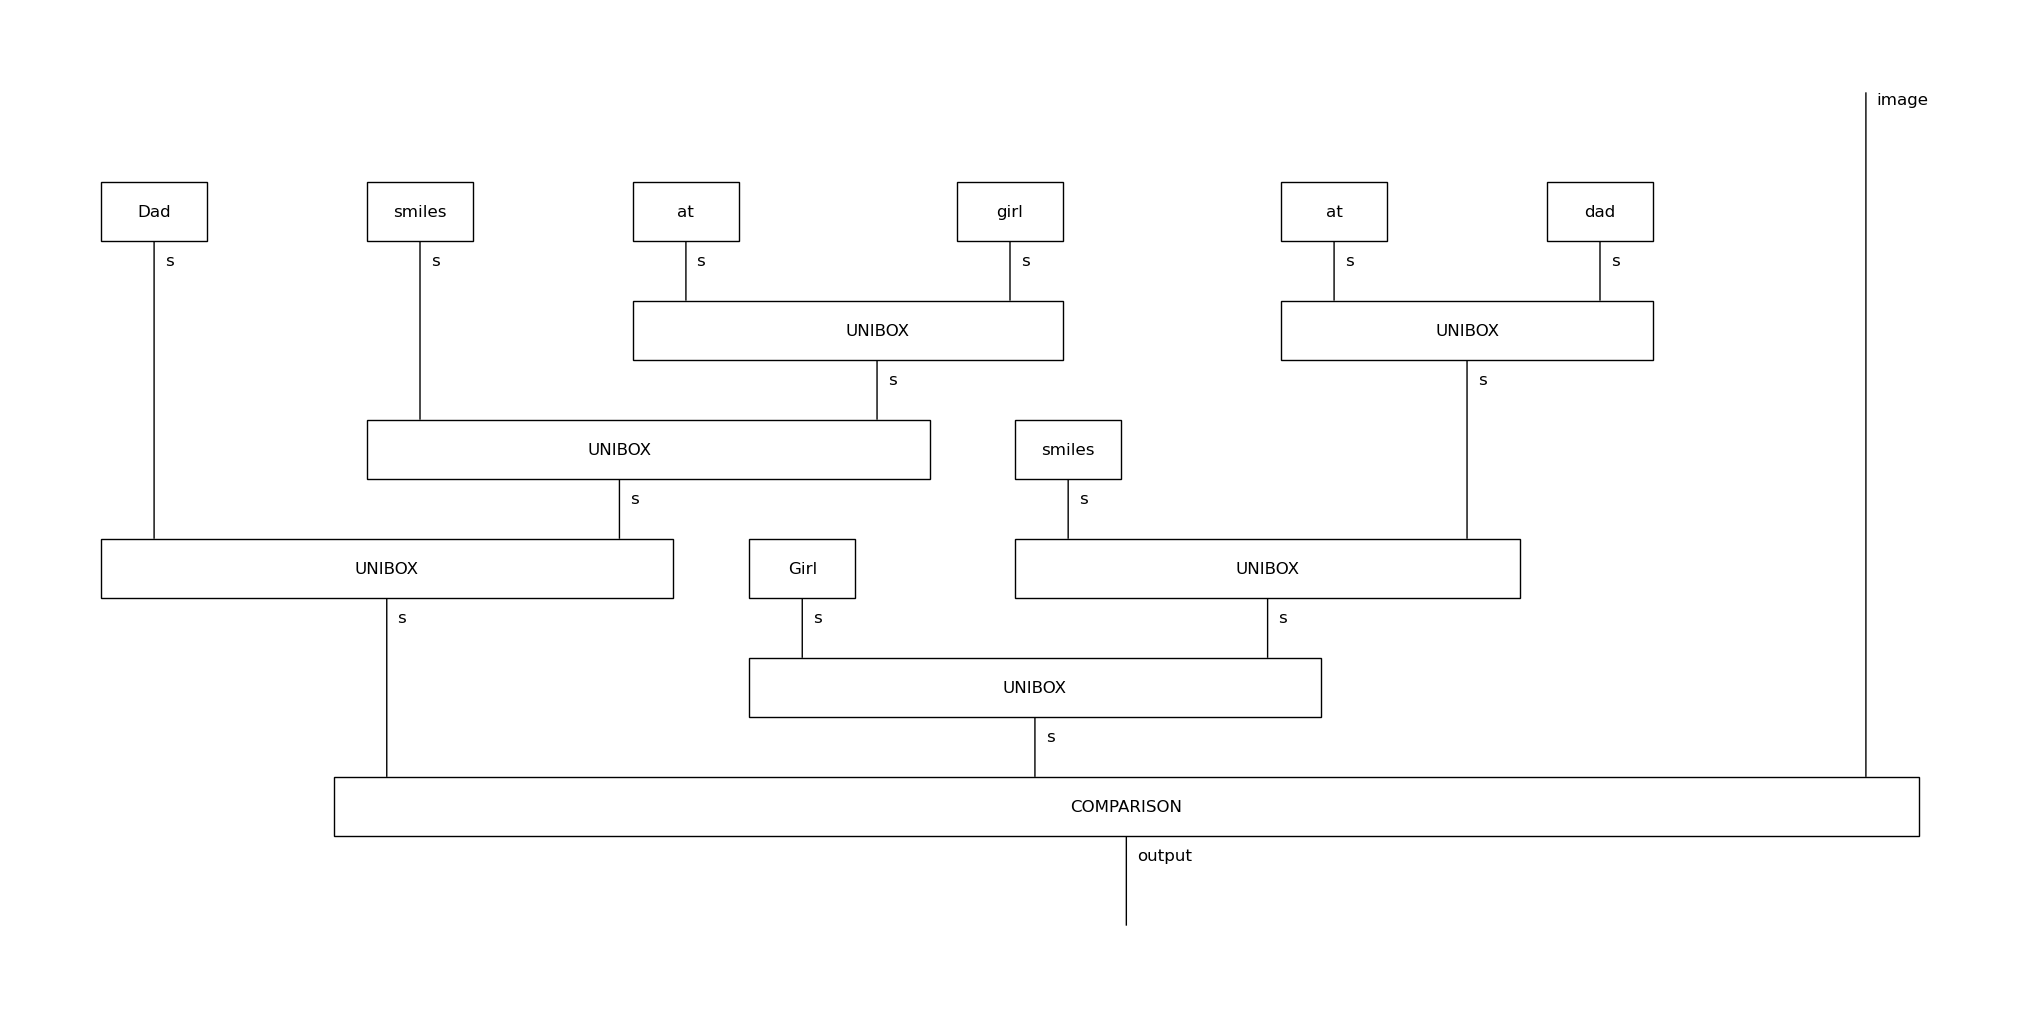



(*) Train: 91 diagrams completed successfully!
(*) Val: 19 diagrams completed successfully!
(*) Test: 20 diagrams completed successfully!


In [181]:
# CREATE FINAL CIRCUIT
def generate_valid_diagrams(diagram_sentence1, diagram_sentence2, df):
    print("************************")
    indicies_to_drop= []
    conc_diagrams = []
    for index, row in df.iterrows():
        try:
            temp = diagram_sentence1[index] @  diagram_sentence2[index] @ image_type >> comparison_box
            conc_diagrams.append(temp)
        except Exception as e:
            # print(f"Error at index in diagram sentence {index}: {e}")
            # print( "    ",df["sentence"].iloc[index])
            indicies_to_drop.append(index)
    # print("************************")

    # print("************************")
    for index, row in df.iterrows():
        if index in indicies_to_drop:
            # print("Removing index: ", index)
            df = df.drop(index = index)
    # print("************************")

    print("Dropped the following indicies:", indicies_to_drop)
    
    return df, conc_diagrams

# Create new Type
output_type = Ty("output")
comparison_box = Box("COMPARISON", AtomicType.SENTENCE @ AtomicType.SENTENCE @ image_type, output_type)

# Draws diagram with comparison box (0,1) - Sentence digram and comparison box is in grammar form

train_df, train_conc_diagrams = generate_valid_diagrams(train_diagrams_sentence_1, train_diagrams_sentence_2, train_df)
val_df, val_conc_diagrams = generate_valid_diagrams(val_diagrams_sentence_1, val_diagrams_sentence_2, val_df)
test_df, test_conc_diagrams = generate_valid_diagrams(test_diagrams_sentence_1, test_diagrams_sentence_2, test_df)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("CHCEKING:")
print(f"     -> {len(train_df)} == {len(train_conc_diagrams)}")
print(f"     -> {len(val_df)} == {len(val_conc_diagrams)}")
print(f"     -> {len(test_df)} == {len(test_conc_diagrams)}")

print(' ↓ template merged diagram : (sentence, image1, image2)')
train_conc_diagrams[sample_index].draw(figsize=(20, 10), fontsize=12)

print("")
print(f"\n(*) Train: {len(train_conc_diagrams)} diagrams completed successfully!")
print(f"(*) Val: {len(val_conc_diagrams)} diagrams completed successfully!")
print(f"(*) Test: {len(test_conc_diagrams)} diagrams completed successfully!")

#### Circuit Template

************************
Dropped the following indicies: []
************************
Dropped the following indicies: []
************************
Dropped the following indicies: []
CHCEKING:
   91 == 91
   19 == 19
   20 == 20
 ↓ template merged circuit : (sentence, image1, image2)


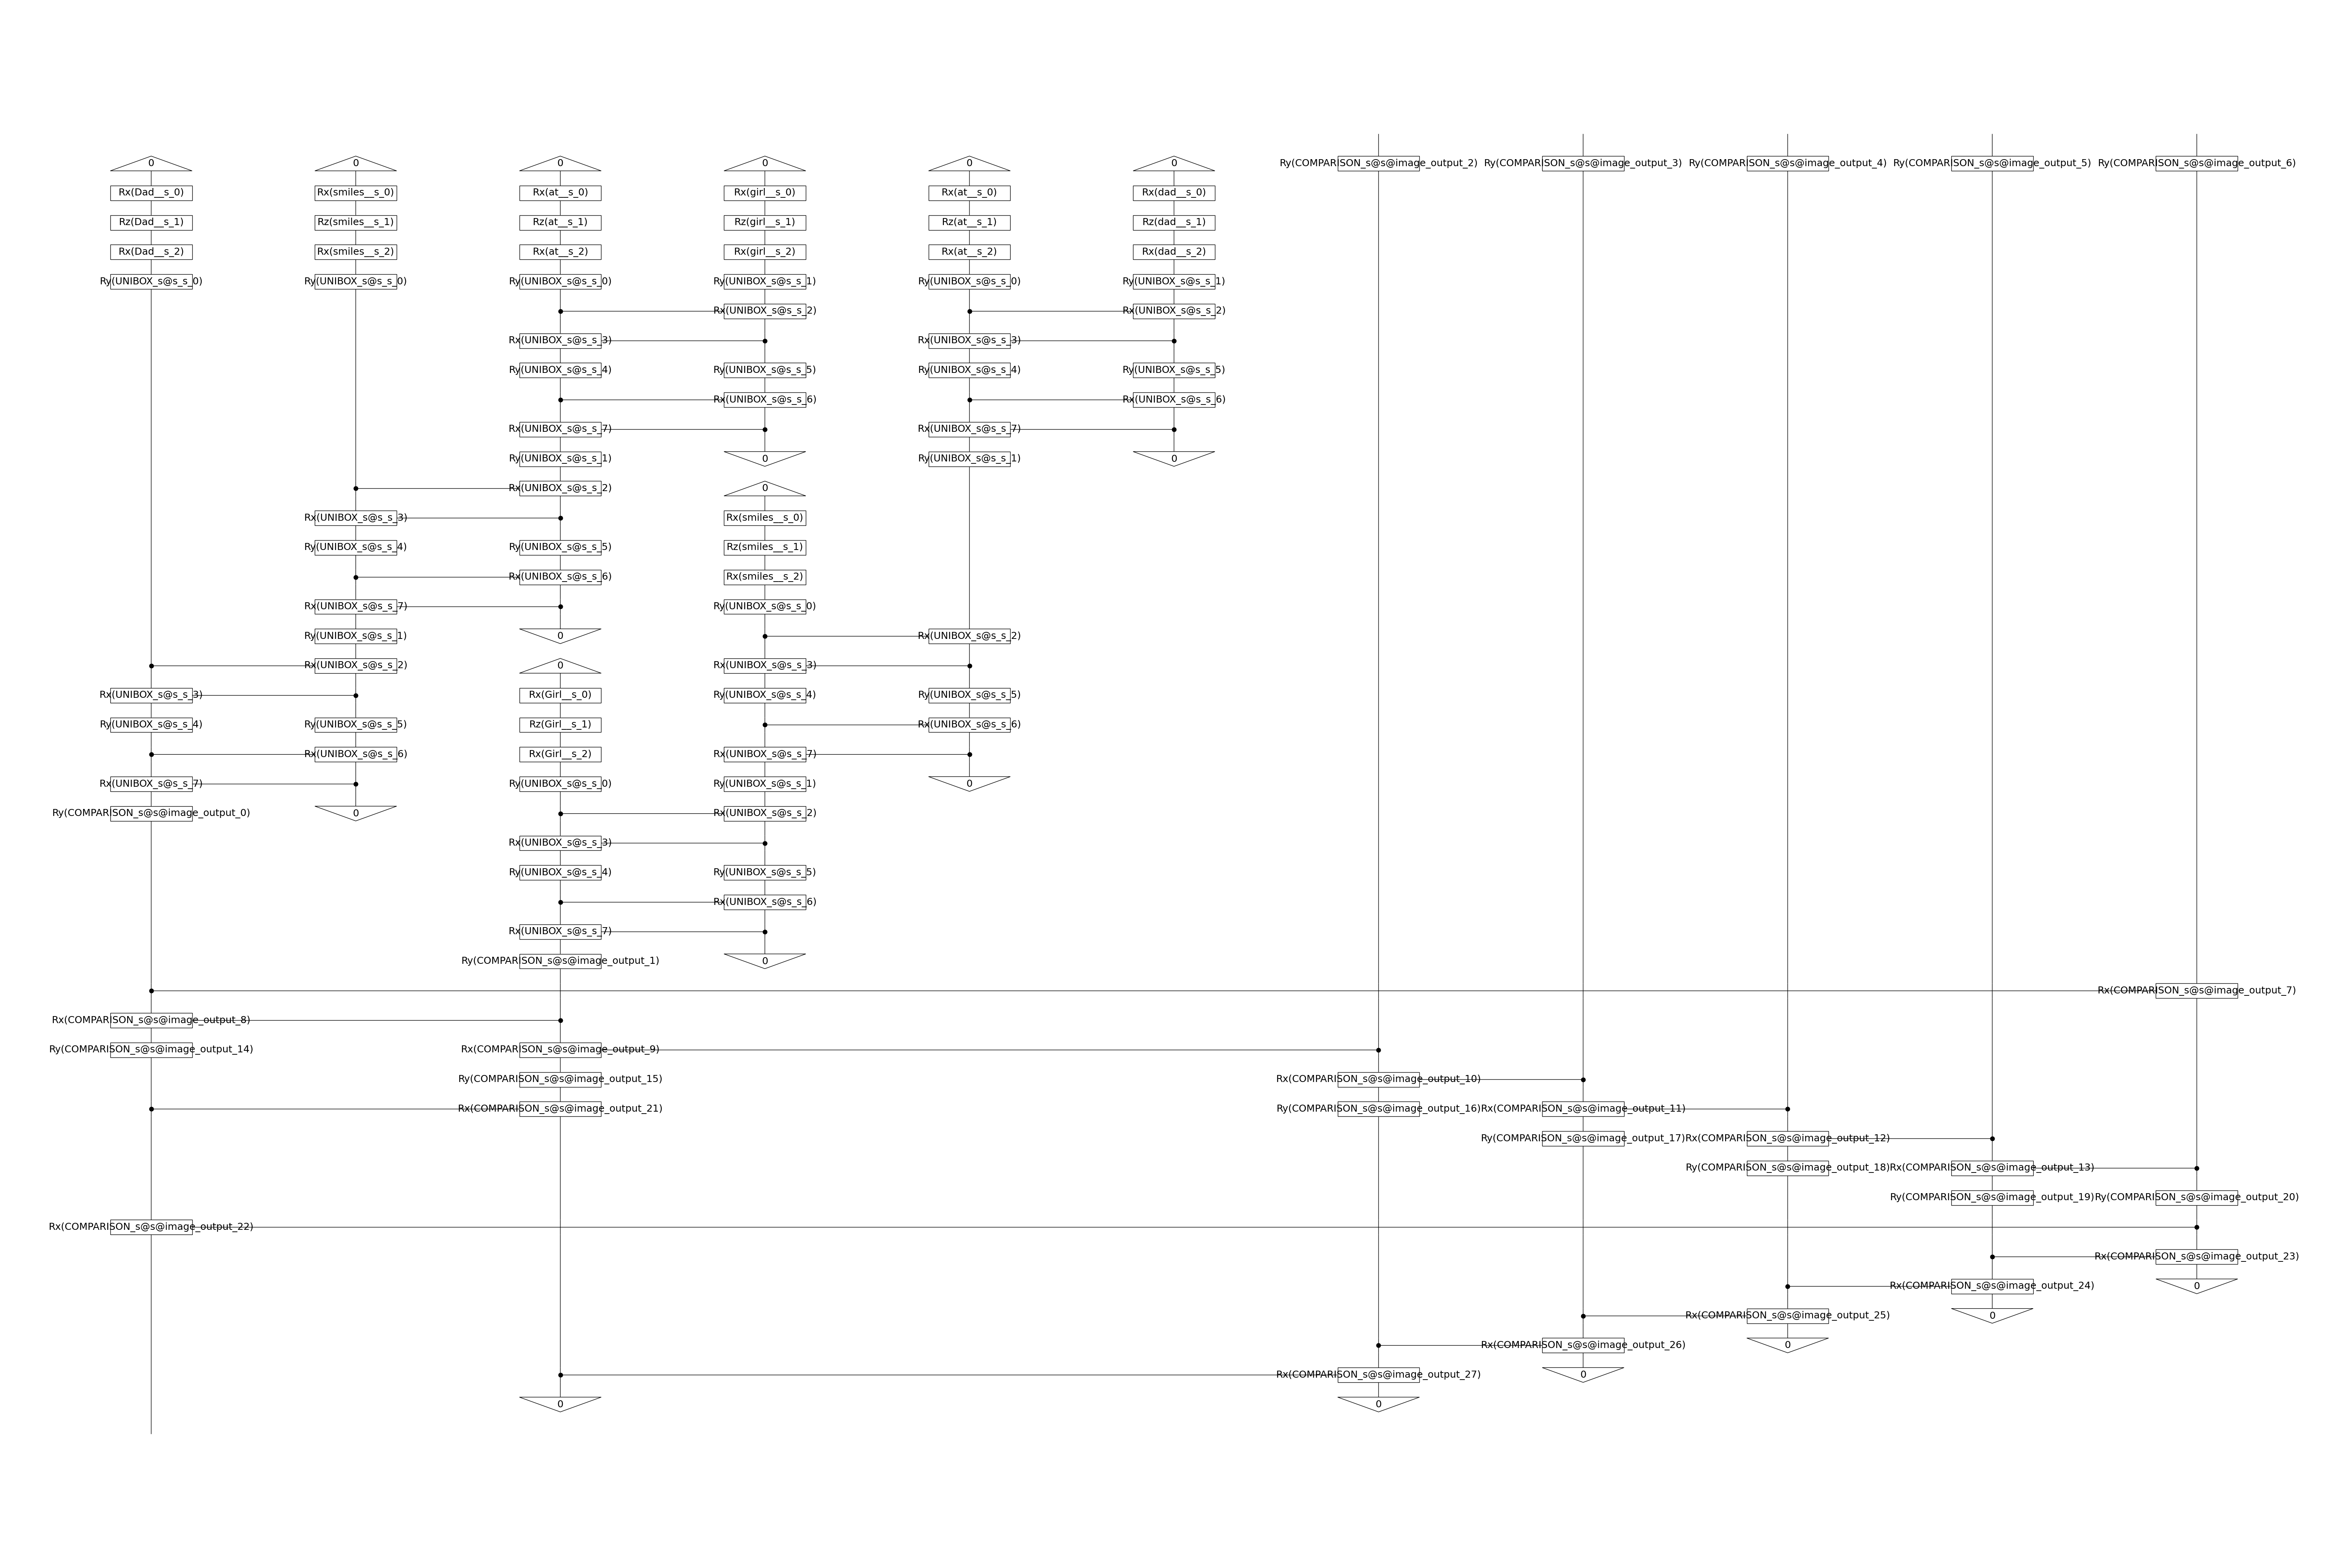



(*) Train: 91 circuits completed successfully!
(*) Val: 19 circuits completed successfully!
(*) Test: 20 circuits completed successfully!


In [182]:
# Ansatz & Circuit
ansatz = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, image_type : 5, output_type : 1},  n_layers=1)

# Incorrect prepositional phrases found in the diagrams
def generate_valid_circuits(conc_diagrams, df):
    print("************************")
    indicies_to_drop = []
    conc_circuit = []
    for index, row in df.iterrows():
        try:
            temp = ansatz(conc_diagrams[index])
            conc_circuit.append(temp)
        except Exception as e:
            print(f"Error at index in diagram sentence {index}: {e}")
            # print( "    ",df["sentence"].iloc[index])
            indicies_to_drop.append(index)
    # print("************************")

    # print("************************")
    for index, row in df.iterrows():
        if index in indicies_to_drop:
            # print("Removing index: ", index)
            df = df.drop(index = index)
    # print("************************")

    print("Dropped the following indicies:", indicies_to_drop)
    
    return df, conc_circuit

train_df, train_conc_circuits = generate_valid_circuits(train_conc_diagrams, train_df)
val_df, val_conc_circuits = generate_valid_circuits(val_conc_diagrams, val_df)
test_df, test_conc_circuits = generate_valid_circuits(test_conc_diagrams, test_df)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("CHCEKING:")
print(f"   {len(train_df)} == {len(train_conc_circuits)}")
print(f"   {len(val_df)} == {len(val_conc_circuits)}")
print(f"   {len(test_df)} == {len(test_conc_circuits)}")

print(' ↓ template merged circuit : (sentence, image1, image2)')
train_conc_circuits[sample_index].draw(figsize=(60, 40), fontsize=18, draw_type_labels = False )

print("")
print(f"\n(*) Train: {len(train_conc_circuits)} circuits completed successfully!")
print(f"(*) Val: {len(val_conc_circuits)} circuits completed successfully!")
print(f"(*) Test: {len(test_conc_circuits)} circuits completed successfully!")


#### Final Circuit 

  ↓ sample quantum circuit : (sentence 1, sentence 2, image)


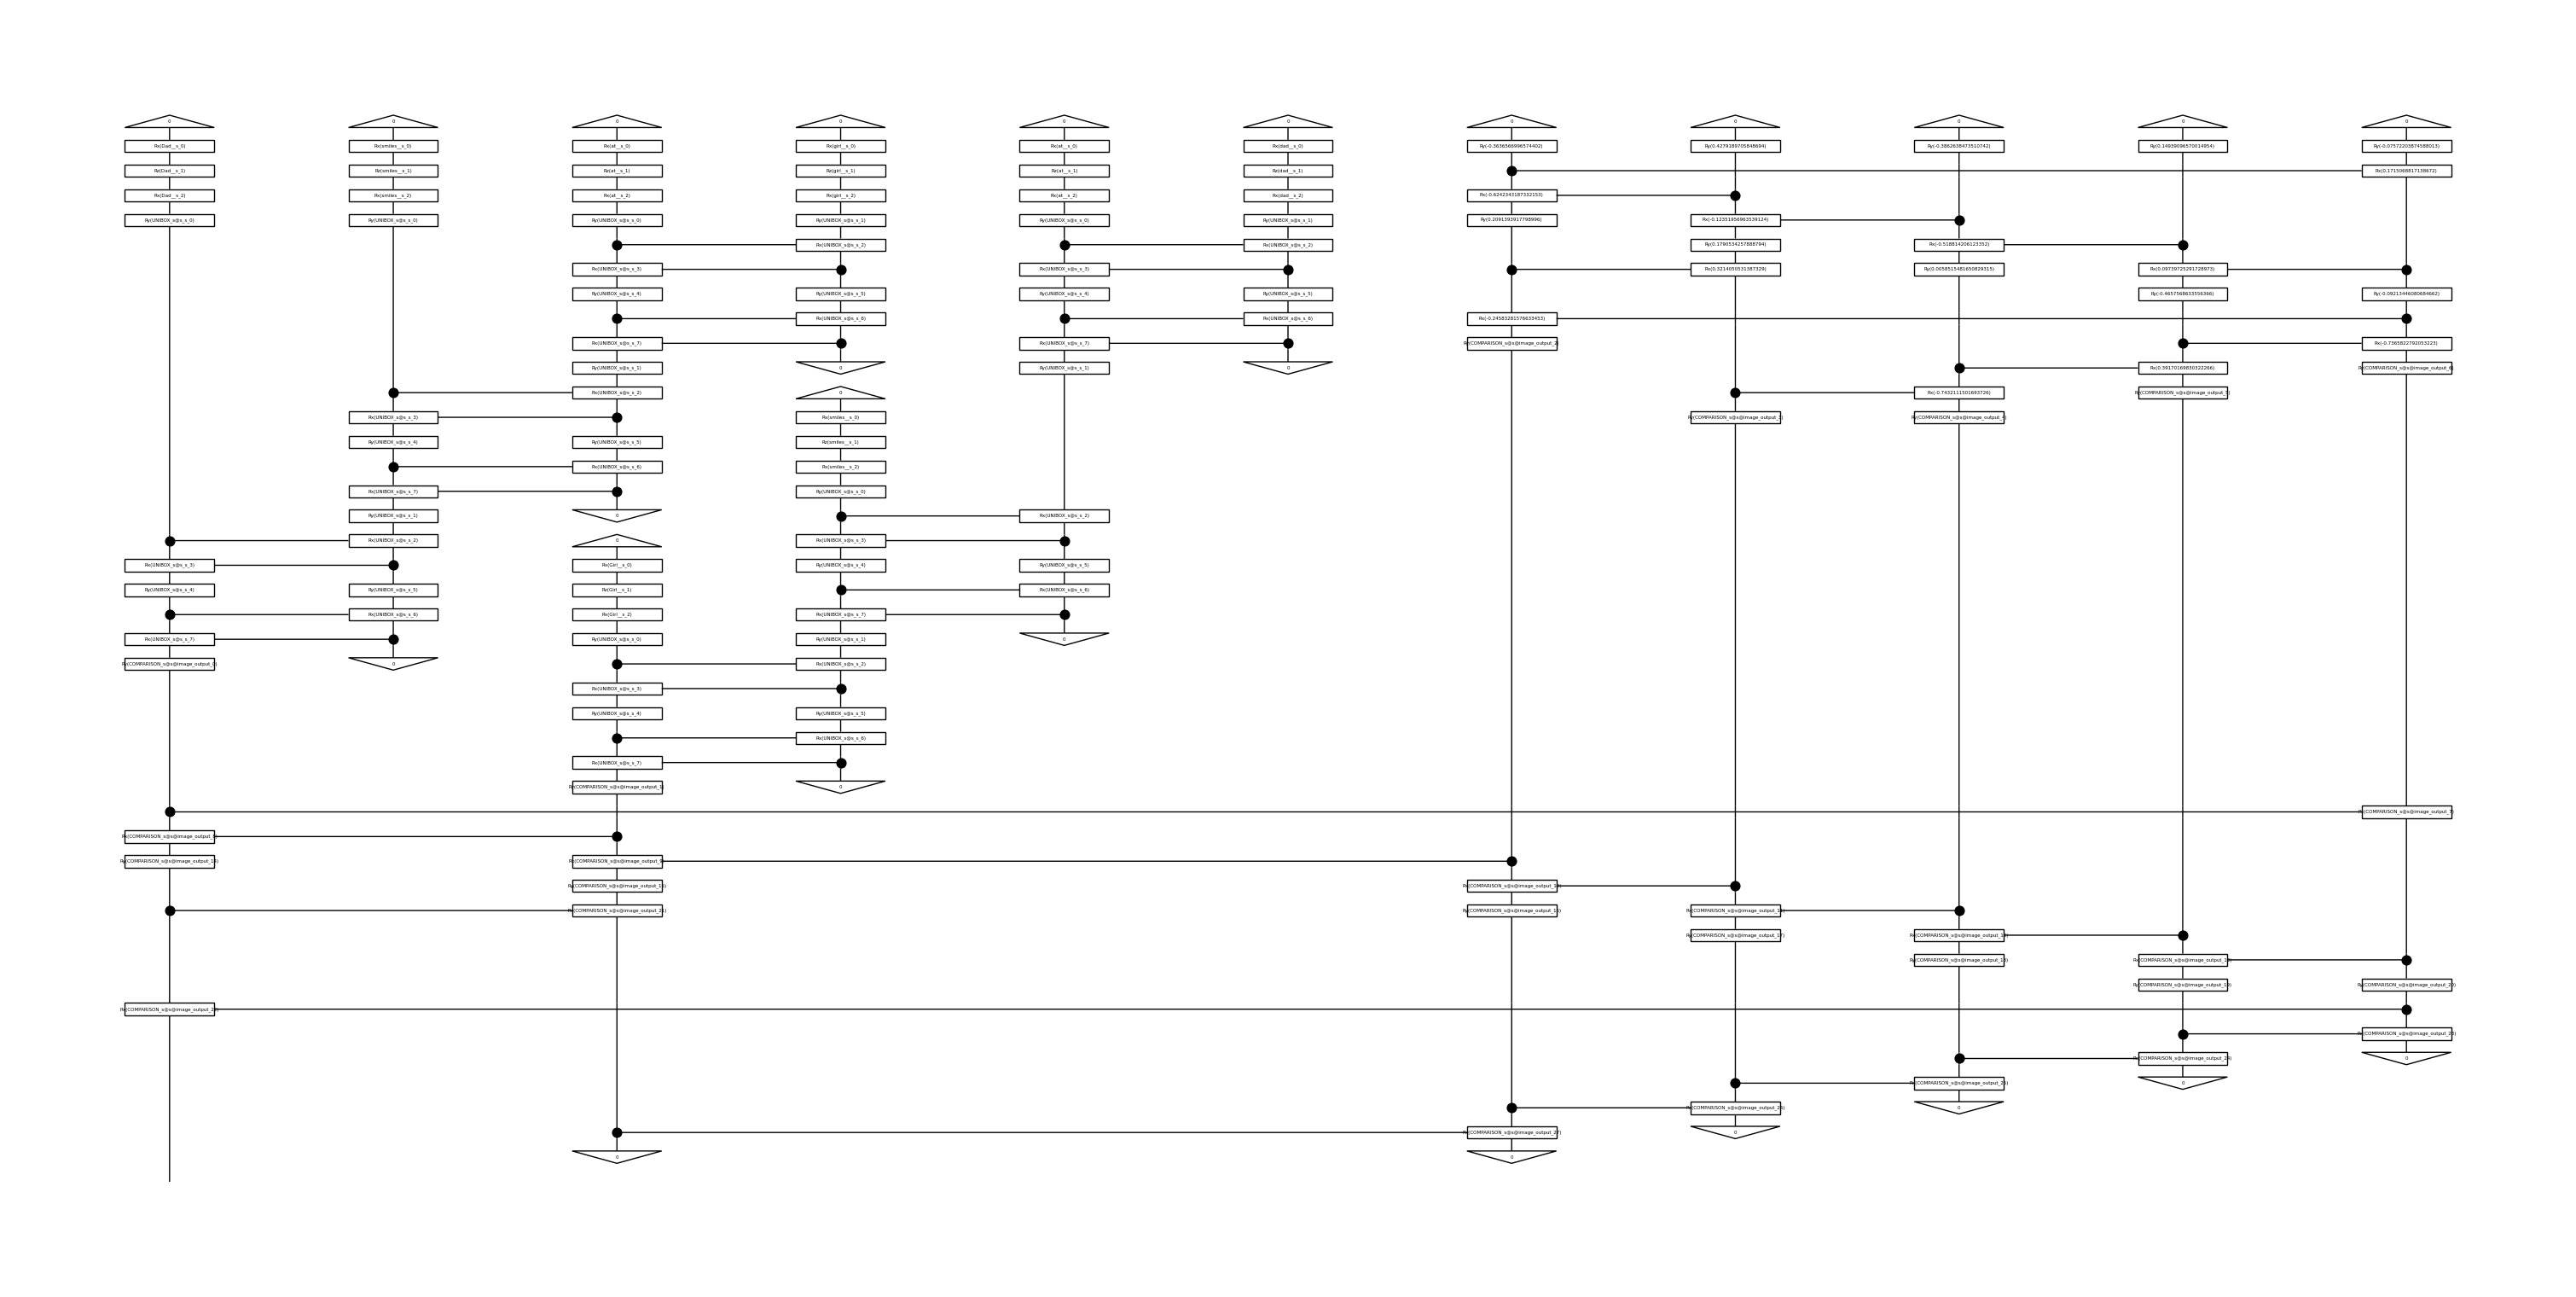


(*) Train: 91 circuits completed successfully!
(*) Val:19 circuits completed successfully!
(*) Test: 20 circuits completed successfully!


In [183]:

train_final_circuit = [(train_circuits_image[index]  >> train_conc_circuits[index]) for index in range(len(train_df))]
val_final_circuit = [(val_circuits_image[index] >> val_conc_circuits[index]) for index in range(len(val_df))]
test_final_circuit = [(test_circuits_image[index] >> test_conc_circuits[index]) for index in range(len(test_df))]

print("  ↓ sample quantum circuit : (sentence 1, sentence 2, image)")
train_final_circuit[sample_index].draw(figsize=(30, 15), fontsize=4, draw_type_labels = False )

print(f"\n(*) Train: {len(train_final_circuit)} circuits completed successfully!")
print(f"(*) Val:{len(val_final_circuit)} circuits completed successfully!")
print(f"(*) Test: {len(test_final_circuit)} circuits completed successfully!")


adding a labels row

-> SHOUDL MOVE THIS TO DATASET SECTION

In [184]:
train_df['labels'] = train_df.apply(lambda row: (row['label_pos'], row['label_neg']), axis=1)
val_df['labels'] = val_df.apply(lambda row: (row['label_pos'], row['label_neg']), axis=1)
test_df['labels'] = test_df.apply(lambda row: (row['label_pos'], row['label_neg']), axis=1)

## Training on Quantum Circuit

this is taken from [7] onwords https://cqcl.github.io/lambeq/examples/quantum-pipeline-jax.html 

In [185]:
print("Variables")
BATCH_SIZE = 7
LEARNING_RATE = 3e-2
EPOCHS = 120
SEED = 42

Variables


#### Run 1

Functions
Definitions
NumpyModel
Initialize the trainer
Dataset

Training ..


Epoch 1:    train/loss: 1.0739   valid/loss: 0.9659   train/acc: 0.4780   valid/acc: 0.6316
Epoch 2:    train/loss: 1.4511   valid/loss: 1.0981   train/acc: 0.4451   valid/acc: 0.6316
Epoch 3:    train/loss: 1.2590   valid/loss: 0.8870   train/acc: 0.6044   valid/acc: 0.6316
Epoch 4:    train/loss: 0.6171   valid/loss: 0.8253   train/acc: 0.6154   valid/acc: 0.5263
Epoch 5:    train/loss: 0.5591   valid/loss: 0.6948   train/acc: 0.6154   valid/acc: 0.6842
Epoch 6:    train/loss: 0.7428   valid/loss: 0.7666   train/acc: 0.6593   valid/acc: 0.5789
Epoch 7:    train/loss: 0.8335   valid/loss: 0.7879   train/acc: 0.6813   valid/acc: 0.6316
Epoch 8:    train/loss: 0.8717   valid/loss: 0.6261   train/acc: 0.6264   valid/acc: 0.7895
Epoch 9:    train/loss: 0.9150   valid/loss: 0.6322   train/acc: 0.4725   valid/acc: 0.6316
Epoch 10:   train/loss: 0.8022   valid/loss: 0.8184   train/acc: 0.5604   valid/acc: 0.4737
Epoch 11:   train/loss: 1.3093   valid/loss: 0.8071   train/acc: 0.5275   valid/

\Plot ..

Testing ..


* Test Results *
------------------------------
Accuracy: 55.00%
------------------------------


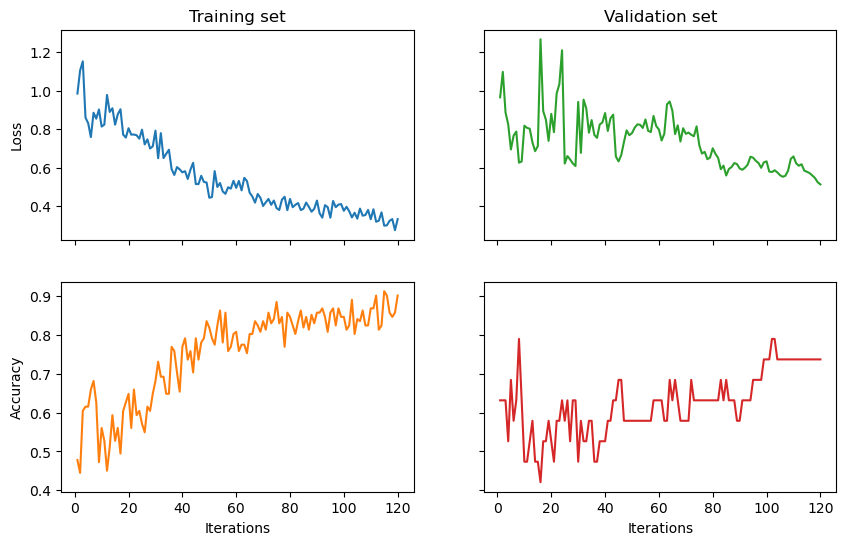

In [186]:
# Create a model 
from lambeq import NumpyModel
from lambeq import BinaryCrossEntropyLoss
from lambeq import QuantumTrainer, SPSAOptimizer, PytorchTrainer
from lambeq import Dataset
from sklearn.metrics import f1_score, precision_score, recall_score
from lambeq import PennyLaneModel

print("Functions")
# Accuracy function contains double counting? 
def accuracy(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2

print("Definitions")
# Labels
train_labels = np.array([[label] for label in train_df['labels']]).squeeze(axis=1)
val_labels = np.array([[label] for label in val_df['labels']]).squeeze(axis=1)
test_labels = np.array([[label] for label in test_df['labels']]).squeeze(axis=1)

# Circuits
all_circuits = train_final_circuit + val_final_circuit + test_final_circuit


# ===========================================
# ===========================================
#              Using Numpy Model

print("NumpyModel")
# pip install "lambeq[extras]"
model = NumpyModel.from_diagrams(all_circuits, use_jit=True)
bce = BinaryCrossEntropyLoss()

print("Initialize the trainer")
trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams = {'a': 0.02, 'c': 0.06, 'A': 0.001 * EPOCHS},
    evaluate_functions={'acc': accuracy},
    evaluate_on_train=True,
    verbose = 'text',
    seed=SEED,
)

print("Dataset")
train_dataset = Dataset(train_final_circuit, train_labels, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_final_circuit, val_labels, shuffle=False)

print("\nTraining ..")
trainer.fit(train_dataset, val_dataset, log_interval=1)

import matplotlib.pyplot as plt
import numpy as np

print("\Plot ..")
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Validation set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs + 1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

print("\nTesting ..")
# Calculate metrics
test_acc = accuracy(model(test_final_circuit), np.array(test_labels))

# Print results neatly formatted as percentages
print("\n\n* Test Results *")
print("------------------------------")
print(f"Accuracy: {test_acc * 100:.2f}%")
print("------------------------------")

#### Run 2

Functions
Variables
Definitions
NumpyModel
Initialize the trainer
Dataset

Training ..


Epoch 1:    train/loss: 1.0731   valid/loss: 0.9652   train/acc: 0.4780   valid/acc: 0.6316
Epoch 2:    train/loss: 1.4686   valid/loss: 1.1077   train/acc: 0.4341   valid/acc: 0.6316
Epoch 3:    train/loss: 1.4532   valid/loss: 0.9204   train/acc: 0.5385   valid/acc: 0.6842
Epoch 4:    train/loss: 1.2764   valid/loss: 0.7770   train/acc: 0.5495   valid/acc: 0.6842
Epoch 5:    train/loss: 0.7263   valid/loss: 0.6576   train/acc: 0.5604   valid/acc: 0.6842
Epoch 6:    train/loss: 0.5124   valid/loss: 0.6658   train/acc: 0.6264   valid/acc: 0.7895
Epoch 7:    train/loss: 0.7226   valid/loss: 0.6615   train/acc: 0.6154   valid/acc: 0.6842
Epoch 8:    train/loss: 0.6646   valid/loss: 0.6361   train/acc: 0.6264   valid/acc: 0.6316
Epoch 9:    train/loss: 0.5977   valid/loss: 0.6205   train/acc: 0.6154   valid/acc: 0.6842
Epoch 10:   train/loss: 0.7226   valid/loss: 0.7952   train/acc: 0.6154   valid/acc: 0.6316
Epoch 11:   train/loss: 0.5987   valid/loss: 0.5319   train/acc: 0.5989   valid/

\Plot ..

Testing ..


* Test Results *
------------------------------
Accuracy: 55.00%
------------------------------


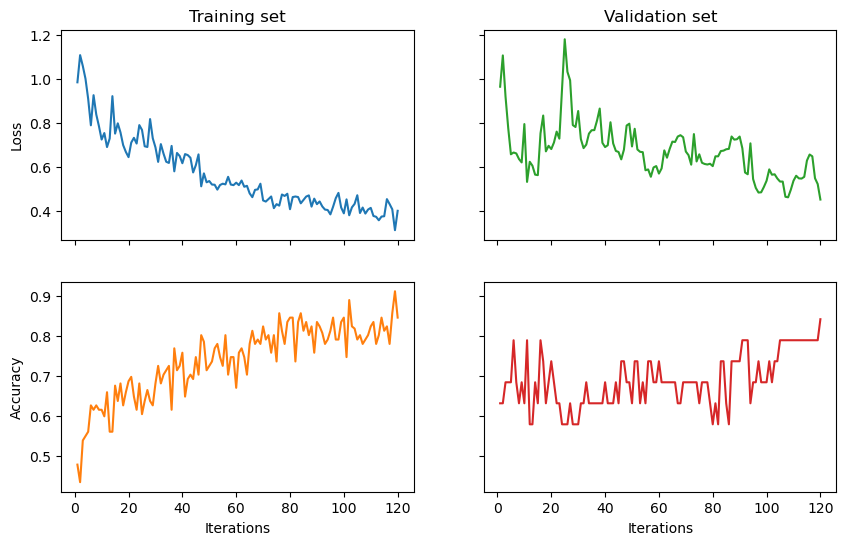

In [187]:
# Create a model 
from lambeq import NumpyModel
from lambeq import BinaryCrossEntropyLoss
from lambeq import QuantumTrainer, SPSAOptimizer, PytorchTrainer
from lambeq import Dataset
from sklearn.metrics import f1_score, precision_score, recall_score
from lambeq import PennyLaneModel

print("Functions")
# Accuracy function contains double counting? 
def accuracy(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2

print("Variables")

print("Definitions")
# Labels
train_labels = np.array([[label] for label in train_df['labels']]).squeeze(axis=1)
val_labels = np.array([[label] for label in val_df['labels']]).squeeze(axis=1)
test_labels = np.array([[label] for label in test_df['labels']]).squeeze(axis=1)

# Circuits
all_circuits = train_final_circuit + val_final_circuit + test_final_circuit


# ===========================================
# ===========================================
#              Using Numpy Model

print("NumpyModel")
# pip install "lambeq[extras]"
model = NumpyModel.from_diagrams(all_circuits, use_jit=True)
bce = BinaryCrossEntropyLoss()

print("Initialize the trainer")
trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams = {'a': 0.02, 'c': 0.06, 'A': 0.001 * EPOCHS},
    evaluate_functions={'acc': accuracy},
    evaluate_on_train=True,
    verbose = 'text',
    seed=SEED,
)

print("Dataset")
train_dataset = Dataset(train_final_circuit, train_labels, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_final_circuit, val_labels, shuffle=False)

print("\nTraining ..")
trainer.fit(train_dataset, val_dataset, log_interval=1)

import matplotlib.pyplot as plt
import numpy as np

print("\Plot ..")
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Validation set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs + 1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

print("\nTesting ..")
# Calculate metrics
test_acc = accuracy(model(test_final_circuit), np.array(test_labels))

# Print results neatly formatted as percentages
print("\n\n* Test Results *")
print("------------------------------")
print(f"Accuracy: {test_acc * 100:.2f}%")
print("------------------------------")

#### Run 3

Functions
Variables
Definitions
NumpyModel
Initialize the trainer
Dataset

Training ..


Epoch 1:    train/loss: 1.0734   valid/loss: 0.9654   train/acc: 0.4780   valid/acc: 0.6316
Epoch 2:    train/loss: 1.4604   valid/loss: 1.1057   train/acc: 0.4341   valid/acc: 0.6316
Epoch 3:    train/loss: 1.4140   valid/loss: 0.8681   train/acc: 0.5165   valid/acc: 0.7368
Epoch 4:    train/loss: 1.3806   valid/loss: 0.7507   train/acc: 0.5824   valid/acc: 0.6316
Epoch 5:    train/loss: 0.8349   valid/loss: 0.7254   train/acc: 0.4615   valid/acc: 0.7895
Epoch 6:    train/loss: 0.5834   valid/loss: 0.8338   train/acc: 0.4945   valid/acc: 0.6842
Epoch 7:    train/loss: 0.8443   valid/loss: 0.8406   train/acc: 0.5385   valid/acc: 0.4211
Epoch 8:    train/loss: 1.1044   valid/loss: 0.7616   train/acc: 0.6209   valid/acc: 0.5789
Epoch 9:    train/loss: 0.8326   valid/loss: 0.7596   train/acc: 0.6758   valid/acc: 0.5789
Epoch 10:   train/loss: 0.7906   valid/loss: 0.7106   train/acc: 0.6374   valid/acc: 0.6842
Epoch 11:   train/loss: 1.2571   valid/loss: 0.5409   train/acc: 0.6154   valid/

\Plot ..

Testing ..


* Test Results *
------------------------------
Accuracy: 55.00%
------------------------------


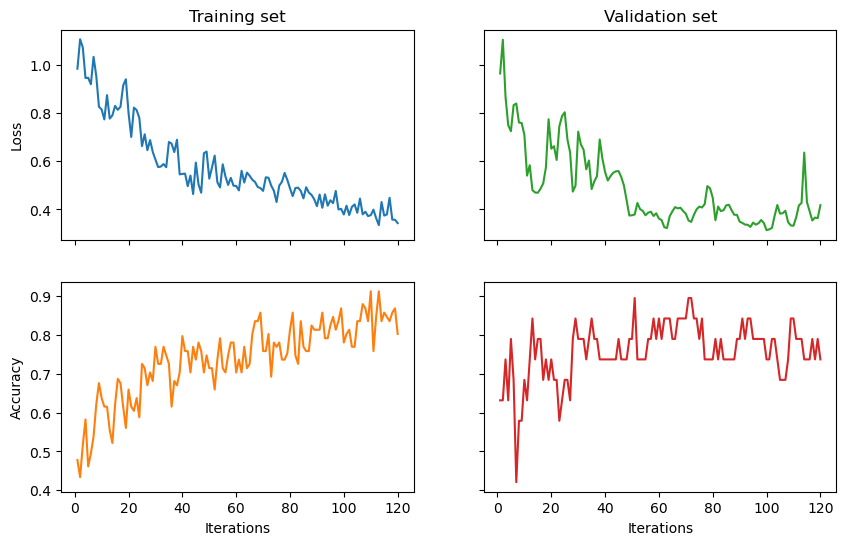

In [188]:
# Create a model 
from lambeq import NumpyModel
from lambeq import BinaryCrossEntropyLoss
from lambeq import QuantumTrainer, SPSAOptimizer, PytorchTrainer
from lambeq import Dataset
from sklearn.metrics import f1_score, precision_score, recall_score
from lambeq import PennyLaneModel

print("Functions")
# Accuracy function contains double counting? 
def accuracy(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2

print("Variables")

print("Definitions")
# Labels
train_labels = np.array([[label] for label in train_df['labels']]).squeeze(axis=1)
val_labels = np.array([[label] for label in val_df['labels']]).squeeze(axis=1)
test_labels = np.array([[label] for label in test_df['labels']]).squeeze(axis=1)

# Circuits
all_circuits = train_final_circuit + val_final_circuit + test_final_circuit


# ===========================================
# ===========================================
#              Using Numpy Model

print("NumpyModel")
# pip install "lambeq[extras]"
model = NumpyModel.from_diagrams(all_circuits, use_jit=True)
bce = BinaryCrossEntropyLoss()

print("Initialize the trainer")
trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams = {'a': 0.02, 'c': 0.06, 'A': 0.001 * EPOCHS},
    evaluate_functions={'acc': accuracy},
    evaluate_on_train=True,
    verbose = 'text',
    seed=SEED,
)

print("Dataset")
train_dataset = Dataset(train_final_circuit, train_labels, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_final_circuit, val_labels, shuffle=False)

print("\nTraining ..")
trainer.fit(train_dataset, val_dataset, log_interval=1)

import matplotlib.pyplot as plt
import numpy as np

print("\Plot ..")
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Validation set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs + 1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

print("\nTesting ..")
# Calculate metrics
test_acc = accuracy(model(test_final_circuit), np.array(test_labels))

# Print results neatly formatted as percentages
print("\n\n* Test Results *")
print("------------------------------")
print(f"Accuracy: {test_acc * 100:.2f}%")
print("------------------------------")

#### Run 4

Functions
Definitions
NumpyModel
Initialize the trainer
Dataset

Training ..


Epoch 1:    train/loss: 1.0729   valid/loss: 0.9650   train/acc: 0.4780   valid/acc: 0.6316
Epoch 2:    train/loss: 1.4848   valid/loss: 1.1051   train/acc: 0.4341   valid/acc: 0.6316
Epoch 3:    train/loss: 1.6730   valid/loss: 0.8062   train/acc: 0.5385   valid/acc: 0.6316
Epoch 4:    train/loss: 1.1824   valid/loss: 0.8800   train/acc: 0.5714   valid/acc: 0.6316
Epoch 5:    train/loss: 0.9819   valid/loss: 1.0168   train/acc: 0.6154   valid/acc: 0.5789
Epoch 6:    train/loss: 0.6979   valid/loss: 0.7283   train/acc: 0.5879   valid/acc: 0.6316
Epoch 7:    train/loss: 1.0211   valid/loss: 0.9177   train/acc: 0.6209   valid/acc: 0.6316
Epoch 8:    train/loss: 0.7430   valid/loss: 0.7256   train/acc: 0.6044   valid/acc: 0.6316
Epoch 9:    train/loss: 0.7944   valid/loss: 0.6684   train/acc: 0.5824   valid/acc: 0.6842
Epoch 10:   train/loss: 0.8225   valid/loss: 0.4957   train/acc: 0.6484   valid/acc: 0.7895
Epoch 11:   train/loss: 0.7373   valid/loss: 0.4770   train/acc: 0.6264   valid/

\Plot ..

Testing ..


* Test Results *
------------------------------
Accuracy: 55.00%
------------------------------


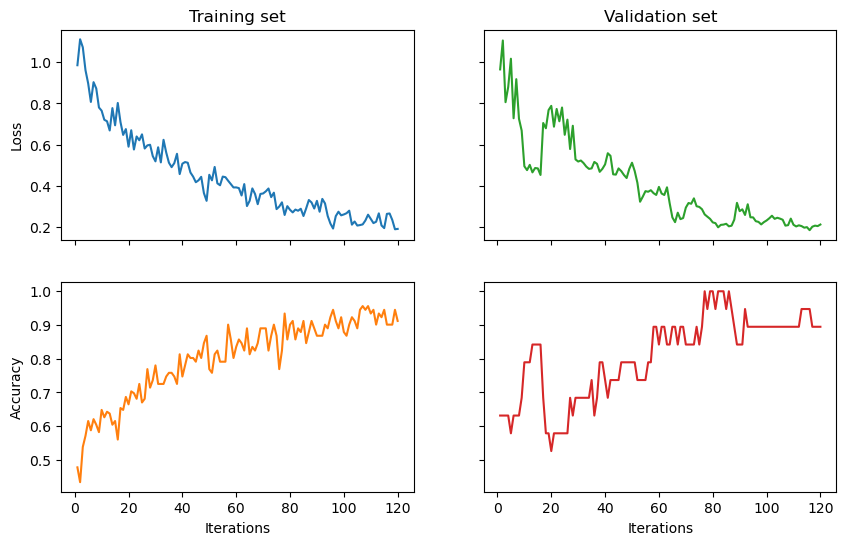

In [189]:
# Create a model 
from lambeq import NumpyModel
from lambeq import BinaryCrossEntropyLoss
from lambeq import QuantumTrainer, SPSAOptimizer, PytorchTrainer
from lambeq import Dataset
from sklearn.metrics import f1_score, precision_score, recall_score
from lambeq import PennyLaneModel

print("Functions")
# Accuracy function contains double counting? 
def accuracy(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2

print("Definitions")
# Labels
train_labels = np.array([[label] for label in train_df['labels']]).squeeze(axis=1)
val_labels = np.array([[label] for label in val_df['labels']]).squeeze(axis=1)
test_labels = np.array([[label] for label in test_df['labels']]).squeeze(axis=1)

# Circuits
all_circuits = train_final_circuit + val_final_circuit + test_final_circuit


# ===========================================
# ===========================================
#              Using Numpy Model

print("NumpyModel")
# pip install "lambeq[extras]"
model = NumpyModel.from_diagrams(all_circuits, use_jit=True)
bce = BinaryCrossEntropyLoss()

print("Initialize the trainer")
trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams = {'a': 0.02, 'c': 0.06, 'A': 0.001 * EPOCHS},
    evaluate_functions={'acc': accuracy},
    evaluate_on_train=True,
    verbose = 'text',
    seed=SEED,
)

print("Dataset")
train_dataset = Dataset(train_final_circuit, train_labels, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_final_circuit, val_labels, shuffle=False)

print("\nTraining ..")
trainer.fit(train_dataset, val_dataset, log_interval=1)

import matplotlib.pyplot as plt
import numpy as np

print("\Plot ..")
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Validation set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs + 1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

print("\nTesting ..")
# Calculate metrics
test_acc = accuracy(model(test_final_circuit), np.array(test_labels))

# Print results neatly formatted as percentages
print("\n\n* Test Results *")
print("------------------------------")
print(f"Accuracy: {test_acc * 100:.2f}%")
print("------------------------------")

#### Run 5

Functions
Definitions
NumpyModel
Initialize the trainer
Dataset

Training ..


2024-09-01 02:41:22.437862: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 12m12.034225s

********************************
[Compiling module jit_diagram_output] Slow compile? XLA was built without compiler optimizations, which can be slow. Try rebuilding with -c opt.
********************************
2024-09-01 02:55:57.095687: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 13m49.591042s

********************************
[Compiling module jit_diagram_output] Slow compile? XLA was built without compiler optimizations, which can be slow. Try rebuilding with -c opt.
********************************
Epoch 1:    train/loss: 1.0729   valid/loss: 0.9650   train/acc: 0.4780   valid/acc: 0.6316
Epoch 2:    train/loss: 1.4818   valid/loss: 1.1062   train/acc: 0.4341   valid/acc: 0.6316
Epoch 3:    train/loss: 1.4959   valid/loss: 0.8131   train/acc: 0.5495   valid/acc: 0.6316
Epoch 4:    train/loss: 1.3058   valid/loss: 0.6734   train/acc: 0

\Plot ..

Testing ..


2024-09-01 03:54:43.882043: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 11m22.035792s

********************************
[Compiling module jit_diagram_output] Slow compile? XLA was built without compiler optimizations, which can be slow. Try rebuilding with -c opt.
********************************




* Test Results *
------------------------------
Accuracy: 60.00%
------------------------------


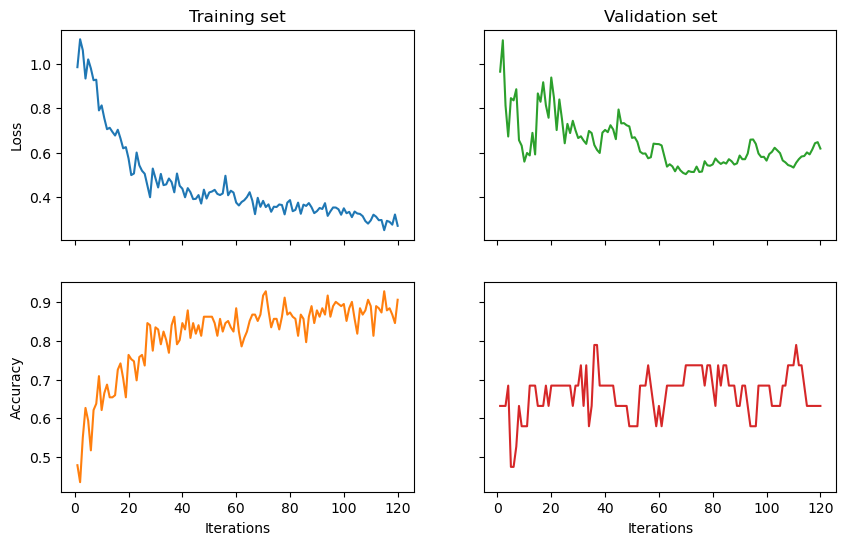

In [190]:
# Create a model 
from lambeq import NumpyModel
from lambeq import BinaryCrossEntropyLoss
from lambeq import QuantumTrainer, SPSAOptimizer, PytorchTrainer
from lambeq import Dataset
from sklearn.metrics import f1_score, precision_score, recall_score
from lambeq import PennyLaneModel

print("Functions")
# Accuracy function contains double counting? 
def accuracy(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2

print("Definitions")
# Labels
train_labels = np.array([[label] for label in train_df['labels']]).squeeze(axis=1)
val_labels = np.array([[label] for label in val_df['labels']]).squeeze(axis=1)
test_labels = np.array([[label] for label in test_df['labels']]).squeeze(axis=1)

# Circuits
all_circuits = train_final_circuit + val_final_circuit + test_final_circuit


# ===========================================
# ===========================================
#              Using Numpy Model

print("NumpyModel")
# pip install "lambeq[extras]"
model = NumpyModel.from_diagrams(all_circuits, use_jit=True)
bce = BinaryCrossEntropyLoss()

print("Initialize the trainer")
trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams = {'a': 0.02, 'c': 0.06, 'A': 0.001 * EPOCHS},
    evaluate_functions={'acc': accuracy},
    evaluate_on_train=True,
    verbose = 'text',
    seed=SEED,
)

print("Dataset")
train_dataset = Dataset(train_final_circuit, train_labels, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_final_circuit, val_labels, shuffle=False)

print("\nTraining ..")
trainer.fit(train_dataset, val_dataset, log_interval=1)

import matplotlib.pyplot as plt
import numpy as np

print("\Plot ..")
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Validation set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs + 1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

print("\nTesting ..")
# Calculate metrics
test_acc = accuracy(model(test_final_circuit), np.array(test_labels))

# Print results neatly formatted as percentages
print("\n\n* Test Results *")
print("------------------------------")
print(f"Accuracy: {test_acc * 100:.2f}%")
print("------------------------------")

## Scratch Paper

In [191]:
# # Create a model 
# from lambeq import NumpyModel
# from lambeq import BinaryCrossEntropyLoss
# from lambeq import QuantumTrainer, SPSAOptimizer, PytorchTrainer
# from lambeq import Dataset
# from sklearn.metrics import f1_score, precision_score, recall_score
# from lambeq import PennyLaneModel
# from datetime import datetime

# print("Functions")
# # Accuracy function contains double counting? 
# def accuracy(y_hat, y):
#     return np.sum(np.round(y_hat) == y) / len(y) / 2

# # Precision function
# def precision(y_hat, y):
#     y_hat_rounded = np.round(y_hat)
#     return precision_score(y, y_hat_rounded, average='weighted') / 2 

# # Recall function
# def recall(y_hat, y):
#     y_hat_rounded = np.round(y_hat)
#     return recall_score(y, y_hat_rounded, average='weighted') / 2

# # F1 score function
# def f1(y_hat, y):
#     y_hat_rounded = np.round(y_hat)
#     return f1_score(y, y_hat_rounded, average='weighted') / 2

# print("Variables")
# BATCH_SIZE = 7
# LEARNING_RATE = 3e-2
# EPOCHS = 120
# SEED = 42

# print("Definitions")
# # Labels
# train_labels = np.array([[label] for label in train_df['labels']]).squeeze(axis=1)
# val_labels = np.array([[label] for label in val_df['labels']]).squeeze(axis=1)
# test_labels = np.array([[label] for label in test_df['labels']]).squeeze(axis=1)

# # Circuits
# all_circuits = train_final_circuit + val_final_circuit + test_final_circuit


# # ===========================================
# # ===========================================
# #              Using Numpy Model

# print("NumpyModel")
# # pip install "lambeq[extras]"
# model = NumpyModel.from_diagrams(all_circuits, use_jit=True)
# bce = BinaryCrossEntropyLoss()

# print("Initialize the trainer")
# trainer = QuantumTrainer(
#     model,
#     loss_function=bce,
#     epochs=EPOCHS,
#     optimizer=SPSAOptimizer,
#     # optim_hyperparams={'a': 0.2, 'c': 0.06, 'A':0.01*EPOCHS},
#     optim_hyperparams = {'a': 0.02, 'c': 0.06, 'A': 0.001 * EPOCHS},
#     # evaluate_functions={'acc': accuracy, 'f1': f1, 'precision': precision, 'recall': recall},
#     evaluate_functions={'acc': accuracy},
#     evaluate_on_train=True,
#     verbose = 'text',
#     seed=0,
# )

# print("Dataset")
# train_dataset = Dataset(train_final_circuit, train_labels, batch_size=BATCH_SIZE)
# val_dataset = Dataset(val_final_circuit, val_labels, shuffle=False)

Training Model

In [192]:
# trainer.fit(train_dataset, val_dataset, log_interval=1)

Training Metrics

In [193]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
# ax_tl.set_title('Training set')
# ax_tr.set_title('Validation set')
# ax_bl.set_xlabel('Iterations')
# ax_br.set_xlabel('Iterations')
# ax_bl.set_ylabel('Accuracy')
# ax_tl.set_ylabel('Loss')

# colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
# range_ = np.arange(1, trainer.epochs + 1)
# ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
# ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
# ax_tr.plot(range_, trainer.val_costs, color=next(colours))
# ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

#### Test Results!

In [194]:
# # Calculate metrics
# test_acc = accuracy(model(test_final_circuit), np.array(test_labels))

# # Print results neatly formatted as percentages
# print("* Test Results *")
# print("------------------------------")
# print(f"Accuracy: {test_acc * 100:.2f}%")
# print("------------------------------")

EXCERSIZE: sample output

In [195]:
# correct = 0
# incorrect = 0

# length = len(train_final_circuit)
# sample_input = train_final_circuit[0:length]  # Assuming train_final_circuit contains circuits

# for index in range(length):
#     sample_output = model(sample_input[index:index + 1])
#     predicted = np.round(sample_output).astype(int).flatten()
#     label = train_labels[index].astype(int)

#     print(f"Probability: {sample_output}")
#     print(f"Predicted: {predicted} | Label: {label}")

#     if np.array_equal(predicted, label):
#         print("Correct!")
#         correct += 1
#     else:
#         print("Incorrect")
#         incorrect += 1

#     print("\n")

# print(f"Correct values = {correct}")
# print(f"Incorrect values = {incorrect}")
# print(f"Total values = ", length)

